In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import matplotlib as mpl
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Turbine_Data.csv")

In [ ]:
df.head()

Unnamed: 0  ActivePower  AmbientTemperatue  \
0  2017-12-31 00:00:00+00:00          NaN                NaN   
1  2017-12-31 00:10:00+00:00          NaN                NaN   
2  2017-12-31 00:20:00+00:00          NaN                NaN   
3  2017-12-31 00:30:00+00:00          NaN                NaN   
4  2017-12-31 00:40:00+00:00          NaN                NaN   

   BearingShaftTemperature  Blade1PitchAngle  Blade2PitchAngle  \
0                      NaN               NaN               NaN   
1                      NaN               NaN               NaN   
2                      NaN               NaN               NaN   
3                      NaN               NaN               NaN   
4                      NaN               NaN               NaN   

   Blade3PitchAngle  ControlBoxTemperature  GearboxBearingTemperature  \
0               NaN                    NaN                        NaN   
1               NaN                    NaN                        NaN   
2               NaN                    NaN                        NaN   
3               NaN                    NaN                        NaN   
4               NaN                    NaN                        NaN   

   GearboxOilTemperature  ...  GeneratorWinding2Temperature  HubTemperature  \
0                    NaN  ...                           NaN             NaN   
1                    NaN  ...                           NaN             NaN   
2                    NaN  ...                           NaN             NaN   
3                    NaN  ...                           NaN             NaN   
4                    NaN  ...                           NaN             NaN   

   MainBoxTemperature  NacellePosition  ReactivePower  RotorRPM  \
0                 NaN              NaN            NaN       NaN   
1                 NaN              NaN            NaN       NaN   
2                 NaN              NaN            NaN       NaN   
3                 NaN              NaN            NaN       NaN   
4                 NaN              NaN            NaN       NaN   

   TurbineStatus  WTG  WindDirection WindSpeed  
0            NaN  G01            NaN       NaN  
1            NaN  G01            NaN       NaN  
2            NaN  G01            NaN       NaN  
3            NaN  G01            NaN       NaN  
4            NaN  G01            NaN       NaN  

[5 rows x 22 columns]

In [ ]:
df.rename(columns = {'Unnamed: 0':'timestamp'}, inplace = True)
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118224 entries, 0 to 118223
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype              
---  ------                        --------------   -----              
 0   timestamp                     118224 non-null  datetime64[ns, UTC]
 1   ActivePower                   94750 non-null   float64            
 2   AmbientTemperatue             93817 non-null   float64            
 3   BearingShaftTemperature       62518 non-null   float64            
 4   Blade1PitchAngle              41996 non-null   float64            
 5   Blade2PitchAngle              41891 non-null   float64            
 6   Blade3PitchAngle              41891 non-null   float64            
 7   ControlBoxTemperature         62160 non-null   float64            
 8   GearboxBearingTemperature     62540 non-null   float64            
 9   GearboxOilTemperature         62438 non-null   float64            
 10  GeneratorRPM        

In [ ]:
df.shape

(118224, 22)

In [ ]:
df.describe()

ActivePower  AmbientTemperatue  BearingShaftTemperature  \
count  94750.000000       93817.000000             62518.000000   
mean     619.109805          28.774654                43.010189   
std      611.275373           4.369145                 5.545312   
min      -38.524659           0.000000                 0.000000   
25%       79.642258          25.627428                39.840247   
50%      402.654893          28.340541                42.910877   
75%     1074.591780          31.664772                47.007976   
max     1779.032433          42.405597                55.088655   

       Blade1PitchAngle  Blade2PitchAngle  Blade3PitchAngle  \
count      41996.000000      41891.000000      41891.000000   
mean           9.749641         10.036535         10.036535   
std           20.644828         20.270465         20.270465   
min          -43.156734        -26.443415        -26.443415   
25%           -0.939849         -0.433264         -0.433264   
50%            0.394399          0.888977          0.888977   
75%            8.099302          8.480194          8.480194   
max           90.143610         90.017830         90.017830   

       ControlBoxTemperature  GearboxBearingTemperature  \
count                62160.0               62540.000000   
mean                     0.0                  64.234170   
std                      0.0                  10.455556   
min                      0.0                   0.000000   
25%                      0.0                  57.872242   
50%                      0.0                  64.834662   
75%                      0.0                  71.079306   
max                      0.0                  82.237932   

       GearboxOilTemperature  GeneratorRPM  GeneratorWinding1Temperature  \
count           62438.000000  62295.000000                  62427.000000   
mean               57.561217   1102.026269                     72.460403   
std                 6.323895    528.063946                     22.627489   
min                 0.000000      0.000000                      0.000000   
25%                53.942181   1029.812177                     55.492241   
50%                57.196089   1124.860720                     65.788800   
75%                61.305312   1515.402005                     85.867449   
max                70.764581   1809.941700                    126.773031   

       GeneratorWinding2Temperature  HubTemperature  MainBoxTemperature  \
count                  62449.000000    62406.000000        62507.000000   
mean                      71.826659       36.897978           39.547603   
std                       22.650255        5.178711            5.732783   
min                        0.000000        0.000000            0.000000   
25%                       54.763998       33.943949           35.812500   
50%                       65.004946       37.003815           39.491310   
75%                       85.337740       40.008425           43.359375   
max                      126.043018       47.996185           54.250000   

       NacellePosition  ReactivePower      RotorRPM  TurbineStatus  \
count     72278.000000   94748.000000  62127.000000   6.290800e+04   
mean        196.290539      88.133966      9.907500   2.280429e+03   
std          88.296554     116.596725      4.718421   3.586034e+05   
min           0.000000    -203.182591      0.000000   0.000000e+00   
25%         145.000000      -0.432137      9.231091   2.000000e+00   
50%         182.000000      35.883659     10.098702   2.000000e+00   
75%         271.000000     147.359075     13.600413   2.000000e+00   
max         357.000000     403.713620     16.273495   6.574653e+07   

       WindDirection     WindSpeed  
count   72278.000000  94595.000000  
mean      196.290539      5.878960  
std        88.296554      2.619084  
min         0.000000      0.000000  
25%       145.000000      3.823330  
50%       182.000000      5.557765  
75%       271.000000      7.506710  
max       357.00

In [ ]:
df.isna().sum()

timestamp                           0
ActivePower                     23474
AmbientTemperatue               24407
BearingShaftTemperature         55706
Blade1PitchAngle                76228
Blade2PitchAngle                76333
Blade3PitchAngle                76333
ControlBoxTemperature           56064
GearboxBearingTemperature       55684
GearboxOilTemperature           55786
GeneratorRPM                    55929
GeneratorWinding1Temperature    55797
GeneratorWinding2Temperature    55775
HubTemperature                  55818
MainBoxTemperature              55717
NacellePosition                 45946
ReactivePower                   23476
RotorRPM                        56097
TurbineStatus                   55316
WTG                                 0
WindDirection                   45946
WindSpeed                       23629
dtype: int64

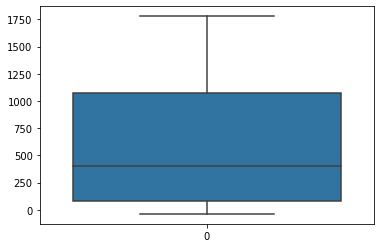

In [ ]:
sns.boxplot(data=df['ActivePower'])

In [ ]:
numVal = df.select_dtypes(include=np.number)

In [ ]:
numVal['ControlBoxTemperature'].unique()

array([nan,  0.])

In [ ]:
numVal = numVal.loc[:, numVal.columns != 'ControlBoxTemperature']

In [ ]:
numVal.corr()

ActivePower  AmbientTemperatue  \
ActivePower                      1.000000          -0.065637   
AmbientTemperatue               -0.065637           1.000000   
BearingShaftTemperature          0.655400           0.246505   
Blade1PitchAngle                -0.368997           0.085461   
Blade2PitchAngle                -0.367978           0.090904   
Blade3PitchAngle                -0.367978           0.090904   
GearboxBearingTemperature        0.818850           0.017216   
GearboxOilTemperature            0.821921           0.162511   
GeneratorRPM                     0.849604          -0.130123   
GeneratorWinding1Temperature     0.931390           0.077859   
GeneratorWinding2Temperature     0.932521           0.078736   
HubTemperature                   0.347363           0.589729   
MainBoxTemperature               0.101627           0.836539   
NacellePosition                  0.028108          -0.037498   
ReactivePower                    0.719092          -0.020313   
RotorRPM                         0.849069          -0.129290   
TurbineStatus                   -0.000135          -0.005511   
WindDirection                    0.028108          -0.037498   
WindSpeed                        0.940390          -0.095308   

                              BearingShaftTemperature  Blade1PitchAngle  \
ActivePower                                  0.655400         -0.368997   
AmbientTemperatue                            0.246505          0.085461   
BearingShaftTemperature                      1.000000         -0.475557   
Blade1PitchAngle                            -0.475557          1.000000   
Blade2PitchAngle                            -0.466856          0.997774   
Blade3PitchAngle                            -0.466856          0.997774   
GearboxBearingTemperature                    0.883344         -0.599178   
GearboxOilTemperature                        0.772887         -0.557949   
GeneratorRPM                                 0.640947         -0.757056   
GeneratorWinding1Temperature                 0.765115         -0.376102   
GeneratorWinding2Temperature                 0.763926         -0.372369   
HubTemperature                               0.809116         -0.198583   
MainBoxTemperature                           0.542104          0.194911   
NacellePosition                              0.183929         -0.058300   
ReactivePower                                0.594546         -0.381478   
RotorRPM                                     0.640584         -0.757147   
TurbineStatus                               -0.000990         -0.000534   
WindDirection                                0.183929         -0.058300   
WindSpeed                                    0.596201         -0.403092   

                              Blade2PitchAngle  Blade3PitchAngle  \
ActivePower                          -0.367978         -0.367978   
AmbientTemperatue                     0.090904          0.090904   
BearingShaftTemperature              -0.466856         -0.466856   
Blade1PitchAngle                      0.997774          0.997774   
Blade2PitchAngle                      1.000000          1.000000   
Blade3PitchAngle                      1.000000          1.000000   
GearboxBearingTemperature            -0.592103         -0.592103   
GearboxOilTemperature                -0.549792         -0.549792   
GeneratorRPM                         -0.754325         -0.754325   
GeneratorWinding1Temperature         -0.371057         -0.371057   
GeneratorWinding2Temperature         -0.367451         -0.367451   
HubTemperature                       -0.190296         -0.190296   
MainBoxTemperature                    0.190562          0.190562   
NacellePosition                      -0.057624         -0.057624   
ReactivePower                        -0.379541         -0.379541   
RotorRPM                             -0.754539         -0.754539   
TurbineStatus                        -0.000636         -0.000636   
WindDirection           

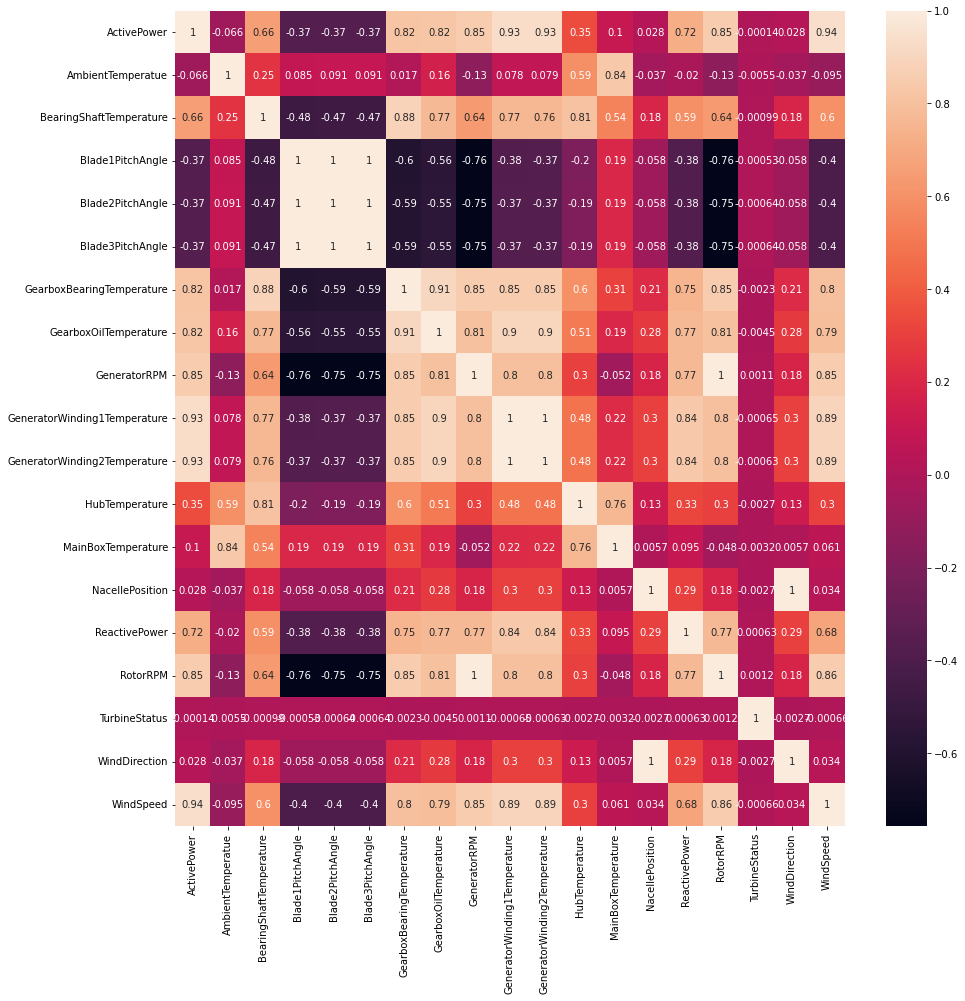

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(numVal.corr(), annot=True);

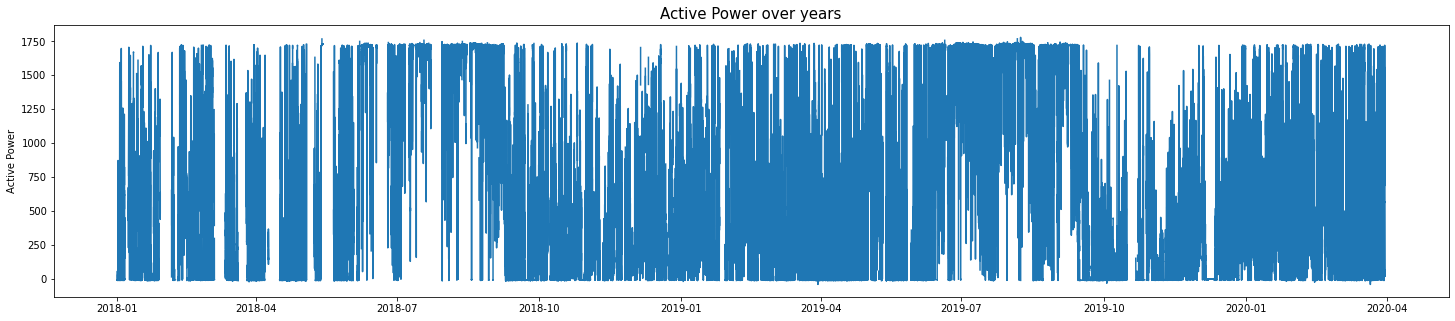

In [ ]:
fig, ax = plt.subplots(figsize=(25,5))
ymin, ymax = plt. ylim()
ax.plot(df['timestamp'],df['ActivePower'])
#plt.ylim(ymin * 50, ymax * 50)
 
# adjust label
ax.set_ylabel("Active Power")
 
# assign title
ax.set_title("Active Power over years" ,size=15)
plt.show()

In [ ]:
df['year']   = df['timestamp'].dt.year
df['month']  = df['timestamp'].dt.month
df['YearMonth'] = df['timestamp'].apply(lambda x: x.strftime("%Y-%m"))
df['day']    = df['timestamp'].dt.day
df['hour']   = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['YearMonthDay'] = df['timestamp'].apply(lambda x: x.strftime("%Y-%m-%d"))
df.set_index('timestamp')

ActivePower  AmbientTemperatue  \
timestamp                                                   
2017-12-31 00:00:00+00:00          NaN                NaN   
2017-12-31 00:10:00+00:00          NaN                NaN   
2017-12-31 00:20:00+00:00          NaN                NaN   
2017-12-31 00:30:00+00:00          NaN                NaN   
2017-12-31 00:40:00+00:00          NaN                NaN   
...                                ...                ...   
2020-03-30 23:10:00+00:00    70.044465          27.523741   
2020-03-30 23:20:00+00:00    40.833474          27.602882   
2020-03-30 23:30:00+00:00    20.777790          27.560925   
2020-03-30 23:40:00+00:00    62.091039          27.810472   
2020-03-30 23:50:00+00:00    68.664425          27.915828   

                           BearingShaftTemperature  Blade1PitchAngle  \
timestamp                                                              
2017-12-31 00:00:00+00:00                      NaN               NaN   
2017-12-31 00:10:00+00:00                      NaN               NaN   
2017-12-31 00:20:00+00:00                      NaN               NaN   
2017-12-31 00:30:00+00:00                      NaN               NaN   
2017-12-31 00:40:00+00:00                      NaN               NaN   
...                                            ...               ...   
2020-03-30 23:10:00+00:00                45.711129          1.515669   
2020-03-30 23:20:00+00:00                45.598573          1.702809   
2020-03-30 23:30:00+00:00                45.462045          1.706214   
2020-03-30 23:40:00+00:00                45.343827          1.575352   
2020-03-30 23:50:00+00:00                45.231610          1.499323   

                           Blade2PitchAngle  Blade3PitchAngle  \
timestamp                                                       
2017-12-31 00:00:00+00:00               NaN               NaN   
2017-12-31 00:10:00+00:00               NaN               NaN   
2017-12-31 00:20:00+00:00               NaN               NaN   
2017-12-31 00:30:00+00:00               NaN               NaN   
2017-12-31 00:40:00+00:00               NaN               NaN   
...                                     ...               ...   
2020-03-30 23:10:00+00:00          1.950088          1.950088   
2020-03-30 23:20:00+00:00          2.136732          2.136732   
2020-03-30 23:30:00+00:00          2.139664          2.139664   
2020-03-30 23:40:00+00:00          2.009781          2.009781   
2020-03-30 23:50:00+00:00          1.933124          1.933124   

                           ControlBoxTemperature  GearboxBearingTemperature  \
timestamp                                                                     
2017-12-31 00:00:00+00:00                    NaN                        NaN   
2017-12-31 00:10:00+00:00                    NaN                        NaN   
2017-12-31 00:20:00+00:00                    NaN                        NaN   
2017-12-31 00:30:00+00:00                    NaN                        NaN   
2017-12-31 00:40:00+00:00                    NaN                        NaN   
...                                          ...                        ...   
2020-03-30 23:10:00+00:00                    0.0                  59.821165   
2020-03-30 23:20:00+00:00                    0.0                  59.142038   
2020-03-30 23:30:00+00:00                    0.0                  58.439439   
2020-03-30 23:40:00+00:00                    0.0                  58.205413   
2020-03-30 23:50:00+00:00                    0.0                  58.581716   

                           GearboxOilTemperature  GeneratorRPM  ...  WTG  \
timestamp                                                       ...        
2017-12-31 00:00:00+00:00                    NaN           NaN  ...  G01   
2017-12-31 00:10:00+00:00                    NaN           NaN  ...  G01   
2017-12-31 00:20:00+00:00                    NaN           NaN  ...  G01   
2017-12-31 00:30:00+00:00                 

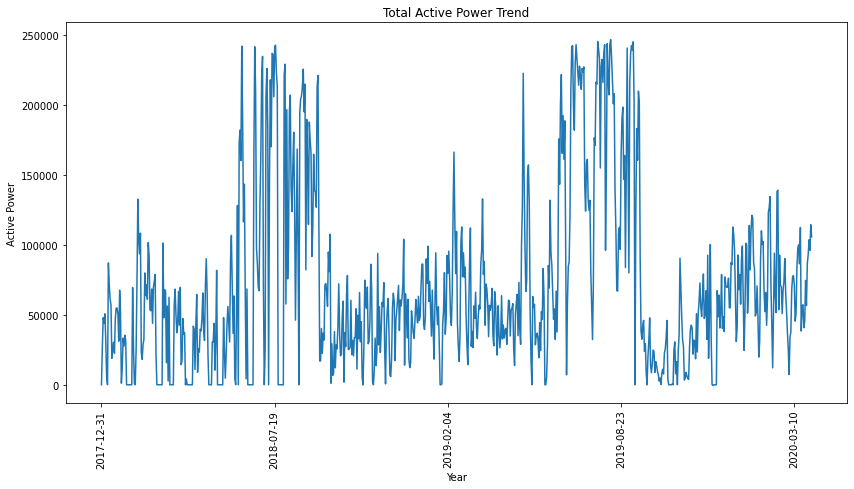

In [ ]:
a = pd.DataFrame(df.groupby(by=['YearMonthDay']).sum())['ActivePower']

plt.figure(figsize=(14, 7))
a.plot(kind='line')

plt.xlabel('Year')
plt.ylabel('Active Power')
plt.title("Total Active Power Trend")

plt.xticks(rotation=90)
plt.show()

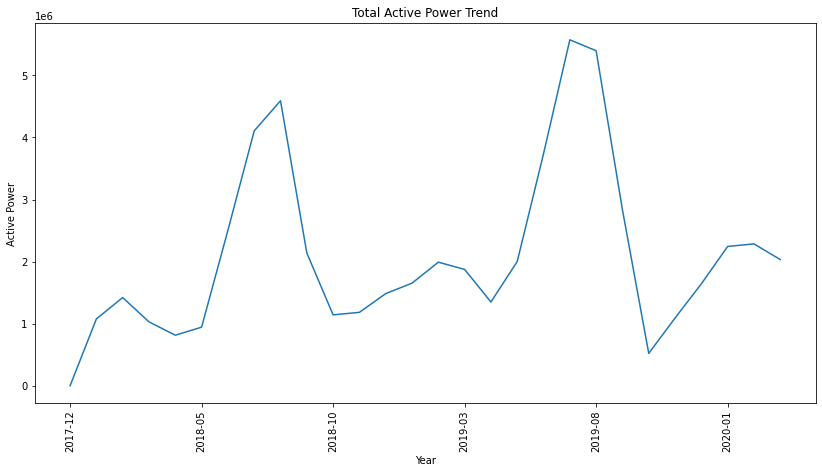

In [ ]:
# Year-to-Year observation of TotalSales.
a = pd.DataFrame(df.groupby(by=['YearMonth']).sum())['ActivePower']

plt.figure(figsize=(14, 7))
a.plot(kind='line')

plt.xlabel('Year')
plt.ylabel('Active Power')
plt.title("Total Active Power Trend")

plt.xticks(rotation=90)
plt.show()

# **EDA on Cleaned Data**

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/v2_cleaned_Turbine_data.csv")

In [ ]:
df1.head()

Unnamed: 0  ActivePower  AmbientTemperatue  \
0  2018-01-01 06:20:00+00:00    26.212347          28.696304   
1  2018-01-01 06:40:00+00:00    59.632658          29.052567   
2  2018-01-01 06:50:00+00:00    40.889650          28.984758   
3  2018-01-01 10:40:00+00:00    34.398111          30.282058   
4  2018-01-01 12:00:00+00:00    29.797653          29.333519   

   BearingShaftTemperature  Blade1PitchAngle  Blade2PitchAngle  \
0                 42.92107          0.390534          0.885209   
1                 42.92107          0.390534          0.885209   
2                 42.92107          0.390534          0.885209   
3                 42.92107          0.390534          0.885209   
4                 42.92107          0.390534          0.885209   

   Blade3PitchAngle  GearboxBearingTemperature  GearboxOilTemperature  \
0          0.885209                  64.843517              57.189826   
1          0.885209                  64.843517              57.189826   
2          0.885209                  64.843517              57.189826   
3          0.885209                  64.843517              57.189826   
4          0.885209                  64.843517              57.189826   

   GeneratorRPM  GeneratorWinding1Temperature  GeneratorWinding2Temperature  \
0    1123.21264                     65.733543                     64.944908   
1    1123.21264                     65.733543                     64.944908   
2    1123.21264                     65.733543                     64.944908   
3    1123.21264                     65.733543                     64.944908   
4    1123.21264                     65.733543                     64.944908   

   HubTemperature  MainBoxTemperature  NacellePosition  ReactivePower  \
0       37.003815                39.5           252.00       3.976499   
1       37.003815                39.5           255.00      11.091660   
2       37.003815                39.5           264.75       4.234497   
3       37.003815                39.5           283.75       5.347792   
4       37.003815                39.5           274.00       6.022326   

    RotorRPM  TurbineStatus  WindDirection  WindSpeed  
0  10.086061            2.0         252.00   3.042750  
1  10.086061            2.0         255.00   3.424814  
2  10.086061            2.0         264.75   3.507172  
3  10.086061            2.0         283.75   3.442212  
4  10.086061            2.0         274.00   3.031363

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78681 entries, 0 to 78680
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    78681 non-null  object 
 1   ActivePower                   78681 non-null  float64
 2   AmbientTemperatue             78681 non-null  float64
 3   BearingShaftTemperature       78681 non-null  float64
 4   Blade1PitchAngle              78681 non-null  float64
 5   Blade2PitchAngle              78681 non-null  float64
 6   Blade3PitchAngle              78681 non-null  float64
 7   GearboxBearingTemperature     78681 non-null  float64
 8   GearboxOilTemperature         78681 non-null  float64
 9   GeneratorRPM                  78681 non-null  float64
 10  GeneratorWinding1Temperature  78681 non-null  float64
 11  GeneratorWinding2Temperature  78681 non-null  float64
 12  HubTemperature                78681 non-null  float64
 13  M

In [ ]:
df1.rename(columns = {'Unnamed: 0':'timestamp'}, inplace = True)
df1['timestamp'] = pd.to_datetime(df1['timestamp'])

In [ ]:
df1.describe()

ActivePower  AmbientTemperatue  BearingShaftTemperature  \
count  78681.000000       78681.000000             78681.000000   
mean     739.188605          28.443807                43.550086   
std      593.504951           4.098241                 4.071880   
min        0.000000           0.000000                 0.000000   
25%      224.646977          25.513330                42.109912   
50%      552.216481          28.128371                42.921070   
75%     1257.720353          31.189589                45.612162   
max     1779.032433          41.809714                55.088655   

       Blade1PitchAngle  Blade2PitchAngle  Blade3PitchAngle  \
count      78681.000000      78681.000000      78681.000000   
mean           1.575280          2.049939          2.049939   
std            7.510494          7.432640          7.432640   
min           -1.960466         -2.406213         -2.406213   
25%            0.123972          0.630099          0.630099   
50%            0.390534          0.885209          0.885209   
75%            0.390534          0.885209          0.885209   
max           89.027520         88.915344         88.915344   

       GearboxBearingTemperature  GearboxOilTemperature  GeneratorRPM  \
count               78681.000000           78681.000000  78681.000000   
mean                   66.113040              58.314735   1228.531253   
std                     7.198266               4.733952    282.880367   
min                     0.000000               0.000000      0.000000   
25%                    64.309929              56.888232   1097.057740   
50%                    64.843517              57.189826   1123.212640   
75%                    68.728233              59.592377   1387.433000   
max                    82.237932              70.764581   1809.941700   

       GeneratorWinding1Temperature  GeneratorWinding2Temperature  \
count                  78681.000000                  78681.000000   
mean                      72.799881                     72.097473   
std                       18.587826                     18.649944   
min                        0.000000                      0.000000   
25%                       64.488313                     63.703108   
50%                       65.733543                     64.944908   
75%                       76.818793                     76.199715   
max                      126.773031                    126.043018   

       HubTemperature  MainBoxTemperature  NacellePosition  ReactivePower  \
count    78681.000000        78681.000000     78681.000000   78681.000000   
mean        37.155905           39.367396       193.114642     108.047848   
std          3.826616            4.307550        76.411062     118.067051   
min          0.000000            0.000000         0.000000    -203.182591   
25%         35.806253           37.657081       163.000000       0.645532   
50%         37.003815           39.500000       182.000000      63.502783   
75%         38.996185           40.831250       218.000000     181.356602   
max         47.996185           53.768750       357.000000     403.713620   

           RotorRPM  TurbineStatus  WindDirection     WindSpeed  
count  78681.000000   7.868100e+04   78681.000000  78681.000000  
mean      11.025410   1.712856e+03     193.114642      6.508584  
std        2.525212   3.206501e+05      76.411062      2.380567  
min        0.000000   0.000000e+00       0.000000      0.000000  
25%        9.841810   2.000000e+00     163.000000      4.694561  
50%       10.086061   2.000000e+00     182.000000      6.104735  
75%       12.441874   2.000000e+00     218.000000      7.938625  
max       16.273495   6.574653e+07     357.000000     22.970893

## Overall Trends & Patterns

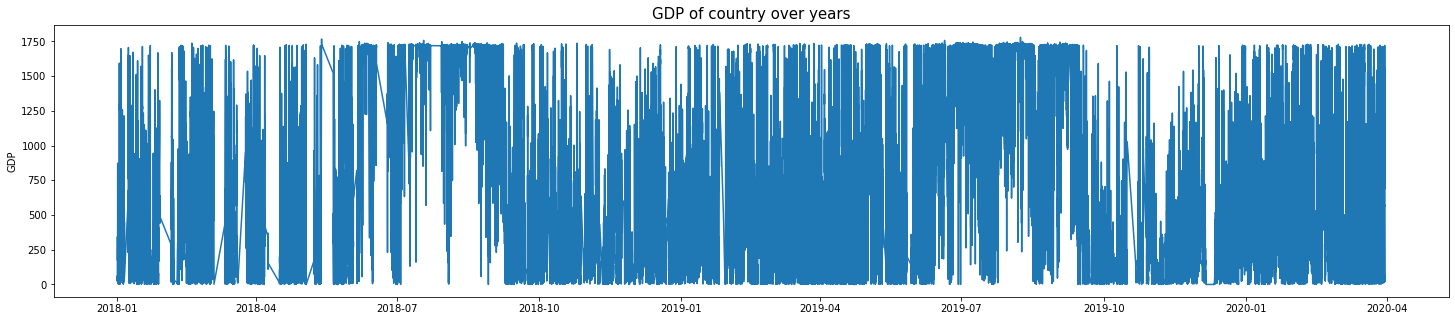

In [ ]:
fig, ax = plt.subplots(figsize=(25,5))
ymin, ymax = plt. ylim()
ax.plot(df1['timestamp'],df1['ActivePower'])
#plt.ylim(ymin * 50, ymax * 50)
 
# adjust label
ax.set_ylabel("GDP")
 
# assign title
ax.set_title("GDP of country over years" ,size=15)
plt.show()

In [ ]:
df1['year']   = df1['timestamp'].dt.year
df1['month']  = df1['timestamp'].dt.month
df1['YearMonth'] = df1['timestamp'].apply(lambda x: x.strftime("%Y-%m"))
df1['day']    = df1['timestamp'].dt.day
df1['hour']   = df1['timestamp'].dt.hour
df1['minute'] = df1['timestamp'].dt.minute
df1['YearMonthDay'] = df1['timestamp'].apply(lambda x: x.strftime("%Y-%m-%d"))
df1.set_index('timestamp')

ActivePower  AmbientTemperatue  \
timestamp                                                   
2018-01-01 06:20:00+00:00    26.212347          28.696304   
2018-01-01 06:40:00+00:00    59.632658          29.052567   
2018-01-01 06:50:00+00:00    40.889650          28.984758   
2018-01-01 10:40:00+00:00    34.398111          30.282058   
2018-01-01 12:00:00+00:00    29.797653          29.333519   
...                                ...                ...   
2020-03-30 23:10:00+00:00    70.044465          27.523741   
2020-03-30 23:20:00+00:00    40.833474          27.602882   
2020-03-30 23:30:00+00:00    20.777790          27.560925   
2020-03-30 23:40:00+00:00    62.091039          27.810472   
2020-03-30 23:50:00+00:00    68.664425          27.915828   

                           BearingShaftTemperature  Blade1PitchAngle  \
timestamp                                                              
2018-01-01 06:20:00+00:00                42.921070          0.390534   
2018-01-01 06:40:00+00:00                42.921070          0.390534   
2018-01-01 06:50:00+00:00                42.921070          0.390534   
2018-01-01 10:40:00+00:00                42.921070          0.390534   
2018-01-01 12:00:00+00:00                42.921070          0.390534   
...                                            ...               ...   
2020-03-30 23:10:00+00:00                45.711129          1.515669   
2020-03-30 23:20:00+00:00                45.598573          1.702809   
2020-03-30 23:30:00+00:00                45.462045          1.706214   
2020-03-30 23:40:00+00:00                45.343827          1.575352   
2020-03-30 23:50:00+00:00                45.231610          1.499323   

                           Blade2PitchAngle  Blade3PitchAngle  \
timestamp                                                       
2018-01-01 06:20:00+00:00          0.885209          0.885209   
2018-01-01 06:40:00+00:00          0.885209          0.885209   
2018-01-01 06:50:00+00:00          0.885209          0.885209   
2018-01-01 10:40:00+00:00          0.885209          0.885209   
2018-01-01 12:00:00+00:00          0.885209          0.885209   
...                                     ...               ...   
2020-03-30 23:10:00+00:00          1.950088          1.950088   
2020-03-30 23:20:00+00:00          2.136732          2.136732   
2020-03-30 23:30:00+00:00          2.139664          2.139664   
2020-03-30 23:40:00+00:00          2.009781          2.009781   
2020-03-30 23:50:00+00:00          1.933124          1.933124   

                           GearboxBearingTemperature  GearboxOilTemperature  \
timestamp                                                                     
2018-01-01 06:20:00+00:00                  64.843517              57.189826   
2018-01-01 06:40:00+00:00                  64.843517              57.189826   
2018-01-01 06:50:00+00:00                  64.843517              57.189826   
2018-01-01 10:40:00+00:00                  64.843517              57.189826   
2018-01-01 12:00:00+00:00                  64.843517              57.189826   
...                                              ...                    ...   
2020-03-30 23:10:00+00:00                  59.821165              55.193793   
2020-03-30 23:20:00+00:00                  59.142038              54.798545   
2020-03-30 23:30:00+00:00                  58.439439              54.380456   
2020-03-30 23:40:00+00:00                  58.205413              54.079014   
2020-03-30 23:50:00+00:00                  58.581716              54.080505   

                           GeneratorRPM  GeneratorWinding1Temperature  ...  \
timestamp                                                              ...   
2018-01-01 06:20:00+00:00   1123.212640                     65.733543  ...   
2018-01-01 06:40:00+00:00   1123.212640                     65.733543  ...   
2018-01-01 06:50:00+00:00   1123.212640                     65.733543  ...   
2018-01-01 10:40:00+00:00   1123

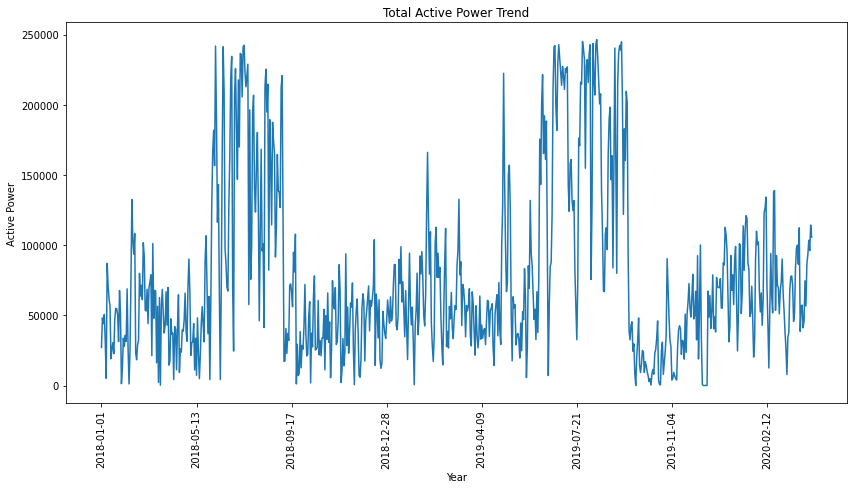

In [ ]:
a = pd.DataFrame(df1.groupby(by=['YearMonthDay']).sum())['ActivePower']

plt.figure(figsize=(14, 7))
a.plot(kind='line')

plt.xlabel('Year')
plt.ylabel('Active Power')
plt.title("Total Active Power Trend")

plt.xticks(rotation=90)
plt.show()

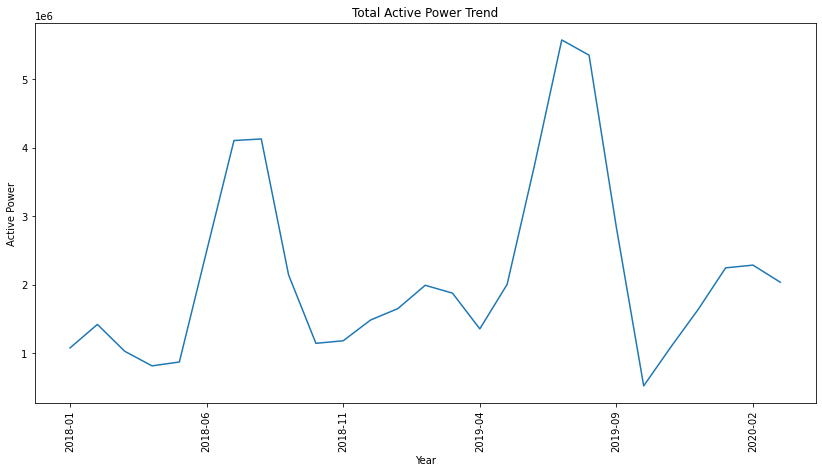

In [ ]:
# Year-to-Year observation of TotalSales.
a = pd.DataFrame(df1.groupby(by=['YearMonth']).sum())['ActivePower']

plt.figure(figsize=(14, 7))
a.plot(kind='line')

plt.xlabel('Year')
plt.ylabel('Active Power')
plt.title("Total Active Power Trend")

plt.xticks(rotation=90)
plt.show()

## Anomalies & Outliers Study

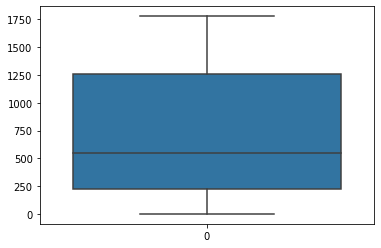

In [ ]:
sns.boxplot(data=df1['ActivePower'])

In [ ]:
#express to plot entire data
fig = px.line(df1.reset_index(), x='timestamp', y='ActivePower', title='Wind Turbine Active Power')
#slider
fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
              dict(count=1, label='1y', step="year", stepmode="backward"),
              dict(count=2, label='2y', step="year", stepmode="backward"),
              dict(step="all")
        ])
    )
)
fig.show()

In [ ]:
dfA = df1.reset_index()[['timestamp', 'ActivePower']].rename({'timestamp':'ds', 'ActivePower':'y'}, axis='columns')
dfA['ds'] = dfA['ds'].dt.tz_localize(None)

In [ ]:
dfA

ds          y
0     2018-01-01 06:20:00  26.212347
1     2018-01-01 06:40:00  59.632658
2     2018-01-01 06:50:00  40.889650
3     2018-01-01 10:40:00  34.398111
4     2018-01-01 12:00:00  29.797653
...                   ...        ...
78676 2020-03-30 23:10:00  70.044465
78677 2020-03-30 23:20:00  40.833474
78678 2020-03-30 23:30:00  20.777790
78679 2020-03-30 23:40:00  62.091039
78680 2020-03-30 23:50:00  68.664425

[78681 rows x 2 columns]

In [ ]:
m = Prophet(changepoint_range=0.95)
m.fit(dfA)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpngb481a8/wxkcwwi4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpngb481a8/mz_i2pm6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16049', 'data', 'file=/tmp/tmpngb481a8/wxkcwwi4.json', 'init=/tmp/tmpngb481a8/mz_i2pm6.json', 'output', 'file=/tmp/tmpngb481a8/prophet_modeljavylo8g/prophet_model-20230204112631.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:26:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:27:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=120, freq='H')

In [ ]:
prediction = m.predict(future)
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds        yhat  yhat_lower   yhat_upper
78796 2020-04-04 19:50:00  533.623772  -23.576407  1051.207910
78797 2020-04-04 20:50:00  486.111121  -74.653779  1041.925080
78798 2020-04-04 21:50:00  437.857947  -91.771645   994.700489
78799 2020-04-04 22:50:00  380.493655 -131.748759   907.411848
78800 2020-04-04 23:50:00  324.916040 -188.257606   833.871590

In [ ]:
dfA

ds          y
0     2018-01-01 06:20:00  26.212347
1     2018-01-01 06:40:00  59.632658
2     2018-01-01 06:50:00  40.889650
3     2018-01-01 10:40:00  34.398111
4     2018-01-01 12:00:00  29.797653
...                   ...        ...
78676 2020-03-30 23:10:00  70.044465
78677 2020-03-30 23:20:00  40.833474
78678 2020-03-30 23:30:00  20.777790
78679 2020-03-30 23:40:00  62.091039
78680 2020-03-30 23:50:00  68.664425

[78681 rows x 2 columns]

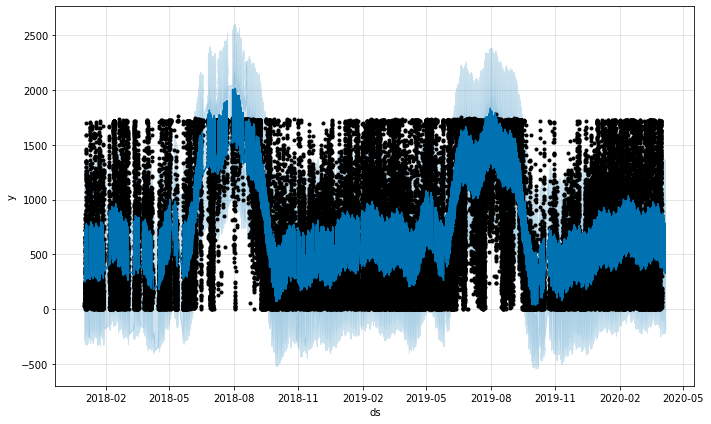

In [ ]:
result = pd.concat([dfA.set_index('ds')['y'], prediction.set_index('ds')[['yhat','yhat_lower','yhat_upper']]], axis=1)
fig1 = m.plot(prediction)

In [ ]:
# Anomalies and outlier detection
result['error'] = result['y'] - result['yhat']
result['uncertainty'] = result['yhat_upper'] - result['yhat_lower']

In [ ]:
result['anomaly'] = result.apply(lambda x: 'Yes' if(np.abs(x['error']) > 1.5*x['uncertainty']) else 'No', axis = 1)
#result['anomaly'] = np.where(np.abs(x['error']) > 1.5*x['uncertainty']), 'Yes', 'No') #Alternate way

In [ ]:
#visualize the anomaly data
fig = px.scatter(result.reset_index(), x='ds', y='y', color='anomaly', title='Wind Turbine Active Power')
#slider
fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
              dict(count=1, label='1y', step="year", stepmode="backward"),
              dict(count=2, label='2y', step="year", stepmode="backward"),
              dict(step="all")
        ])
    )
)
fig.show()

In [ ]:
result

y        yhat  yhat_lower   yhat_upper  \
ds                                                                    
2018-01-01 06:20:00  26.212347  294.874667 -258.431637   868.446792   
2018-01-01 06:40:00  59.632658  293.528825 -284.977209   792.492712   
2018-01-01 06:50:00  40.889650  293.034233 -240.957978   849.281762   
2018-01-01 10:40:00  34.398111  324.954892 -239.082813   875.481336   
2018-01-01 12:00:00  29.797653  398.557375 -127.730086   928.249181   
...                        ...         ...         ...          ...   
2020-04-04 19:50:00        NaN  533.623772  -23.576407  1051.207910   
2020-04-04 20:50:00        NaN  486.111121  -74.653779  1041.925080   
2020-04-04 21:50:00        NaN  437.857947  -91.771645   994.700489   
2020-04-04 22:50:00        NaN  380.493655 -131.748759   907.411848   
2020-04-04 23:50:00        NaN  324.916040 -188.257606   833.871590   

                          error  uncertainty anomaly  
ds                                                    
2018-01-01 06:20:00 -268.662319  1126.878429      No  
2018-01-01 06:40:00 -233.896167  1077.469921      No  
2018-01-01 06:50:00 -252.144583  1090.239740      No  
2018-01-01 10:40:00 -290.556780  1114.564149      No  
2018-01-01 12:00:00 -368.759723  1055.979268      No  
...                         ...          ...     ...  
2020-04-04 19:50:00         NaN  1074.784317      No  
2020-04-04 20:50:00         NaN  1116.578859      No  
2020-04-04 21:50:00         NaN  1086.472134      No  
2020-04-04 22:50:00         NaN  1039.160606      No  
2020-04-04 23:50:00         NaN  1022.129196      No  

[78801 rows x 7 columns]

In [ ]:
result.replace([np.inf, -np.inf], np.nan, inplace=True)
result = result.dropna()

In [ ]:
#y_true = result[(result['yhat'].isnull() == False)]['y']
y_true = result['y']
y_true = y_true.reset_index()
y_true = y_true['y']
y_true

0        26.212347
1        59.632658
2        40.889650
3        34.398111
4        29.797653
           ...    
78676    70.044465
78677    40.833474
78678    20.777790
78679    62.091039
78680    68.664425
Name: y, Length: 78681, dtype: float64

In [ ]:
#y_pred = result[(result['yhat'].isnull() == False)]['yhat']
y_pred = result['yhat']
y_pred = y_pred.reset_index()
y_pred = y_pred['yhat']
y_pred

0        294.874667
1        293.528825
2        293.034233
3        324.954892
4        398.557375
            ...    
78676    444.837667
78677    435.275559
78678    426.046640
78679    417.258656
78680    409.016012
Name: yhat, Length: 78681, dtype: float64

In [ ]:
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 335.645


In [ ]:
import math
MSE = np.square(np.subtract(y_true,y_pred)).mean() 

RMSE = math.sqrt(MSE)
print("Mean Square Error:")
print(MSE)
print("Root Mean Square Error:")
print(RMSE)

Mean Square Error:
183829.865078903
Root Mean Square Error:
428.75385138667036


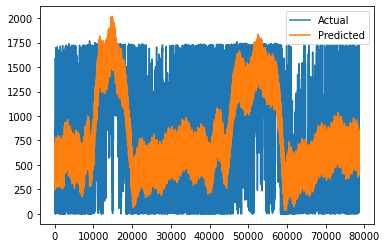

In [ ]:
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

## Autocorrelation & Partial Autocorrelation
### 1. Autocorrelation -> Moving Average (MA) -> q
### 2. Partial Autocorrelation -> Auto Regressive (AR) -> p
### 3. Stationary Test (Augmented Dicky-Fuller) -> d -> SARIMA

In [ ]:
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler

In [ ]:
dfA = df1.groupby(by=['YearMonthDay']).mean()
dfA = dfA.reset_index()
dfA.rename(columns = {'YearMonthDay':'timestamp'}, inplace = True)
dfA['timestamp'] = pd.to_datetime(dfA['timestamp'])

In [ ]:
result = adfuller(dfA['ActivePower'])
labels =  ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observation Used']
for value,label in zip(result,labels):
  print(label + ' : ' + str(value))
if result[1] <= 0.05:
  print('strong evidence agaisnt the null hypothesis(H0), reject the null hypothesis. Data has no unit root and is stationary.')
else:
  print('weak evidence agaisnt the null hypothesis(H0), time series has a unit root, indicating it is non-stationary.')

ADF Test Statistic : -3.2872237065510284
p-value : 0.01545932439224049
#Lags Used : 7
Number of Observation Used : 740
strong evidence agaisnt the null hypothesis(H0), reject the null hypothesis. Data has no unit root and is stationary.


In [ ]:
# d = 0, no need differencing

24


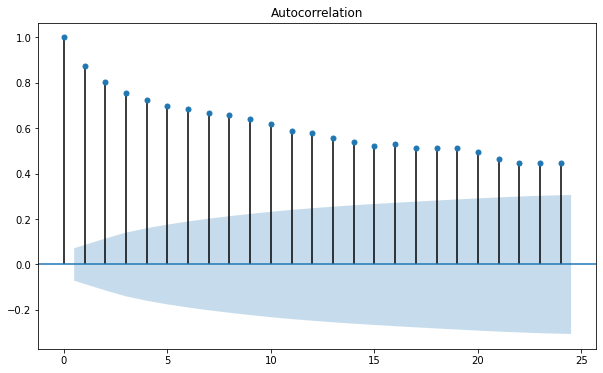

In [ ]:
lags = 2*12 # 12 month
print(lags)
plt.rc("figure", figsize=(10,6))
sm.graphics.tsa.plot_acf(dfA['ActivePower'], lags=lags);
# The blue shaded region is the confidence interval with a default value of α = 0.05.
# Anything within this range represents a value that has no significant correlation 
# with the most recent value for the price.

In [ ]:
# q = 1, since not alot power spike

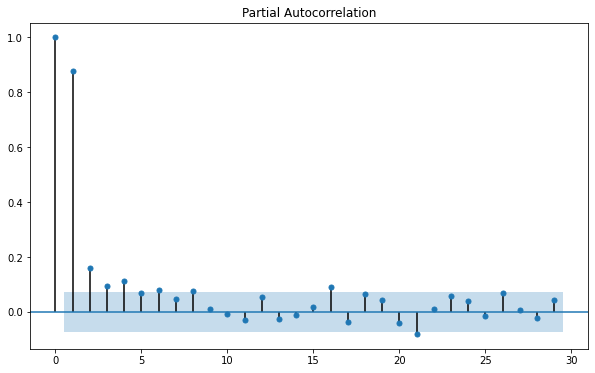

In [ ]:
plt.rc("figure", figsize=(10,6))
sm.graphics.tsa.plot_pacf(dfA['ActivePower']);

In [ ]:
# p = 2

In [ ]:
import statsmodels.api as sm

In [ ]:
dfA.shape

(748, 25)

In [ ]:
## For Hyperparameter Tuning
#test_size = 10
#train, test = dfA['ActivePower'][:-test_size], dfA['ActivePower'][-test_size:]

In [ ]:
train, test = dfA['ActivePower'][0:718], dfA['ActivePower'][718:749]

scaler = MinMaxScaler(feature_range=(0,1))

train_data = scaler.fit_transform(train.values.reshape(-1,1))
test_data = scaler.transform(test.values.reshape(-1,1))

In [ ]:
model = sm.tsa.statespace.SARIMAX(train_data,order=(2,0,1),seasonal_order=(2,0,1,12))

In [ ]:
# Tuned model
#model = sm.tsa.statespace.SARIMAX(train_data,order=(1,1,2),seasonal_order=(1,1,2,12))

In [ ]:
results=model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
#get the predictions and residuals
predictions = results.forecast(len(test_data))
predictions = np.array(predictions)

In [ ]:
predictions

array([0.31401377, 0.31970944, 0.31932387, 0.31957509, 0.32082629,
       0.31826712, 0.30987187, 0.30496173, 0.29885613, 0.30517135,
       0.30469097, 0.29541544, 0.29448265, 0.30543823, 0.30289716,
       0.29312451, 0.29828142, 0.28878806, 0.28568737, 0.28136129,
       0.27677213, 0.27988324, 0.28063948, 0.27354135, 0.27230533,
       0.27613045, 0.27405235, 0.26895644, 0.27019794, 0.26513203])

In [ ]:
predictions = scaler.inverse_transform(predictions.reshape(-1,1))
test_data = scaler.inverse_transform(test_data)

In [ ]:
df_T = dfA.iloc[718:749][['timestamp', 'ActivePower']].reset_index()
df_T2 = pd.DataFrame(predictions) 
df_T2.columns = ['Pred']
merged_pred = pd.concat([df_T, df_T2], axis=1)
merged_pred

index  timestamp  ActivePower        Pred
0     718 2020-03-01   443.058496  540.166772
1     719 2020-03-02   390.027361  549.964459
2     720 2020-03-03   341.133560  549.301201
3     721 2020-03-04   122.348957  549.733343
4     722 2020-03-05   676.893151  551.885664
5     723 2020-03-06   345.379836  547.483385
6     724 2020-03-07   516.674962  533.041868
7     725 2020-03-08   629.447133  524.595441
8     726 2020-03-09   673.519002  514.092578
9     727 2020-03-10   581.532630  524.956026
10    728 2020-03-11   466.289248  524.129672
11    729 2020-03-12   570.315539  508.173903
12    730 2020-03-13   619.637333  506.569319
13    731 2020-03-14   800.312824  525.415116
14    732 2020-03-15   787.305117  521.043962
15    733 2020-03-16   644.891382  504.233048
16    734 2020-03-17   857.485779  513.103970
17    735 2020-03-18   367.360814  496.773474
18    736 2020-03-19   629.455480  491.439660
19    737 2020-03-20   485.411496  483.997942
20    738 2020-03-21   432.529893  476.103668
21    739 2020-03-22   481.172384  481.455402
22    740 2020-03-23   552.187880  482.756288
23    741 2020-03-24   425.815287  470.546078
24    742 2020-03-25   754.076163  468.419873
25    743 2020-03-26   732.042233  474.999845
26    744 2020-03-27   728.896074  471.425095
27    745 2020-03-28   874.011580  462.659101
28    746 2020-03-29   840.439852  464.794728
29    747 2020-03-30   873.498776  456.080345

In [ ]:
residuals = test_data - predictions

Text(0, 0.5, 'Error')

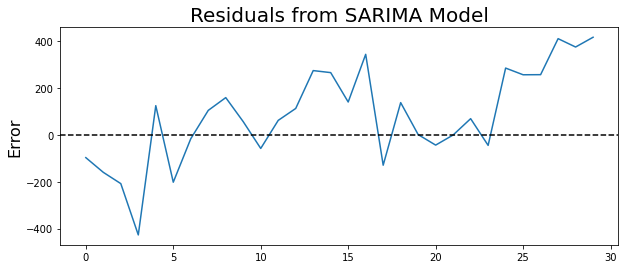

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

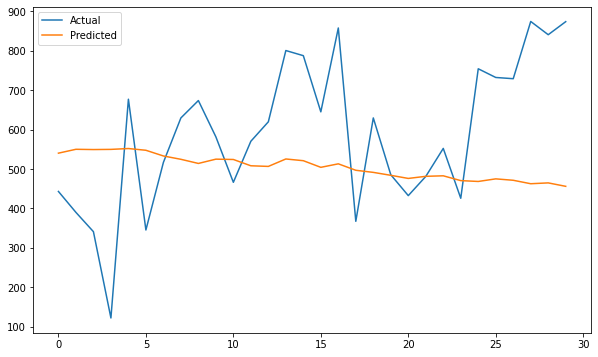

In [ ]:
# plot expected vs actual
pyplot.plot(test_data, label='Actual')
pyplot.plot(predictions, label='Predicted')
pyplot.legend()
pyplot.show()

In [ ]:
mae = mean_absolute_error(test_data, predictions)
print('MAE: %.3f' % mae)

MAE: 174.921


In [ ]:
import math
MSE = np.square(np.subtract(test_data,predictions)).mean() 
 
RMSE = math.sqrt(MSE)
print("Mean Square Error:")
print(MSE)
print("Root Mean Square Error:")
print(RMSE)

Mean Square Error:
46841.00949309331
Root Mean Square Error:
216.42783899742037


# Hypeparameter Tuning

In [ ]:
params = {
  0:[(1,1,1), (1,1,1,12)],
  1:[(1,1,0), (1,1,1,12)],
  2:[(1,1,0), (1,1,0,12)],
  3:[(1,1,0), (0,1,0,12)],
  4:[(1,1,1), (1,1,0,12)],
  5:[(1,1,1), (2,1,0,12)],
  6:[(1,1,2), (1,1,2,12)],
  7:[(1,1,1), (1,1,2,12)],
  8:[(1,1,1), (2,1,2,12)],
  9:[(1,1,0), (1,1,2,12)],
  10:[(2,1,1), (2,1,1,12)],
  11:[(2,1,1), (1,1,1,12)],
  12:[(2,1,1), (1,1,0,12)],
  13:[(1,1,2), (2,1,2,12)],
  14:[(1,1,2), (1,1,0,12)],
  15:[(0,1,1), (1,1,1,12)]
}

In [ ]:
import itertools
p  = q = range(0,3)
d = range(0,2)
pdq = list(itertools.product(p, d, q))
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [ ]:
columns=['ActivePower']
#area=[i for i in df['areacode'].unique()]
steps=30

In [ ]:
#function returns dataframe with best parameters
def sarimax_gridsearch(ts,col,params, maxiter=5000):
  '''
  Input: 
      ts : your time series data
      col : product category on which the model is being built
      maxiter : number of iterations, increase if your model isn't converging
      frequency : default='M' for month. Change to suit your time series frequency
          e.g. 'D' for day, 'H' for hour, 'Y' for year. 
      
  Return:
      Print and save out top parameter combinations
      Returns dataframe of parameter combinations ranked by AIC
  '''
  # Run a grid search with pdq and seasonal pdq parameters and get the best AIC value
  ans = []
  for i in range(0,len(params)):
    
    mod = sm.tsa.statespace.SARIMAX(ts,
                  order=params[i][0],
                  seasonal_order=params[i][1],
                  enforce_stationarity=False,
                  enforce_invertibility=False
                  )

    output = mod.fit()
    ans.append([col,params[i][0][0],params[i][0][1],params[i][0][2], params[i][1][0],params[i][1][1],params[i][1][2],params[i][1][3],params[i][0],params[i][1], output.aic])
    print('SARIMAX {} : parameters {},{} AIC={} '.format(col,params[i][0], params[i][1], output.aic))
  # Convert into dataframe
  ans_df = pd.DataFrame(ans, columns=['product','p','d','q', 'Ps','Ds','Qs','Ss','pdq','pdqs', 'aic'])
  # Sort and return top  combination
  ans_df = ans_df.sort_values(by=['product','aic'],ascending=True)[0:1]

  return ans_df

In [ ]:
best_param=pd.DataFrame() # --- Dataframe to store the best parameters for active power 
prediction=pd.DataFrame() # -- Dataframe to store the predictins for next 30 days for active power
ans = []
par={} 

for c in columns:
  # STEP 1 - Calling function to get best paramaters for active power
  df_ans=sarimax_gridsearch(dfA[c],c,params)
  # STEP 2 - Storing the best parameters for active power
  best_param=best_param.append(df_ans)
  best_param=best_param.sort_values(by=['product','aic'],ascending=True)

  print('for product {}'.format(c))
  print('best pdq is {}'.format(best_param.loc[(best_param['product']==c)]['pdq'].iloc[0]))
  print('best pdqs is {}'.format(best_param.loc[(best_param['product']==c)]['pdqs'].iloc[0]))

  # STEP 3- Building model with best parameters to make forecast for next 30 days   
  smx = sm.tsa.statespace.SARIMAX(
          dfA[c],
          order=best_param.loc[(best_param['product']==c)]['pdq'].iloc[0],
          seasonal_order=best_param.loc[(best_param['product']==c)]['pdqs'].iloc[0],
          enforce_stationarity=False,
          enforce_invertibility=False
        )

  model = smx.fit()
  predictions = model.get_forecast(
      steps=steps
    ).predicted_mean

  df_forecast = pd.DataFrame(predictions)
  df_forecast.columns=[c]

  forecast=df_forecast
  forecast=forecast.fillna(0)
  
  prediction=pd.concat([prediction,forecast],axis=0)

SARIMAX ActivePower : parameters (1, 1, 1),(1, 1, 1, 12) AIC=9823.923378860967 
SARIMAX ActivePower : parameters (1, 1, 0),(1, 1, 1, 12) AIC=9882.654244121637 
SARIMAX ActivePower : parameters (1, 1, 0),(1, 1, 0, 12) AIC=10113.567746949806 
SARIMAX ActivePower : parameters (1, 1, 0),(0, 1, 0, 12) AIC=10492.236229502927 
SARIMAX ActivePower : parameters (1, 1, 1),(1, 1, 0, 12) AIC=10053.176667627064 
SARIMAX ActivePower : parameters (1, 1, 1),(2, 1, 0, 12) AIC=9802.889654993403 


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX ActivePower : parameters (1, 1, 2),(1, 1, 2, 12) AIC=9645.427452106693 
SARIMAX ActivePower : parameters (1, 1, 1),(1, 1, 2, 12) AIC=9656.814066068735 
SARIMAX ActivePower : parameters (1, 1, 1),(2, 1, 2, 12) AIC=9658.814022347095 
SARIMAX ActivePower : parameters (1, 1, 0),(1, 1, 2, 12) AIC=9713.08368414782 
SARIMAX ActivePower : parameters (2, 1, 1),(2, 1, 1, 12) AIC=9666.241983679374 
SARIMAX ActivePower : parameters (2, 1, 1),(1, 1, 1, 12) AIC=9825.674968968171 
SARIMAX ActivePower : parameters (2, 1, 1),(1, 1, 0, 12) AIC=10039.599736923787 
SARIMAX ActivePower : parameters (1, 1, 2),(2, 1, 2, 12) AIC=9647.42287710578 
SARIMAX ActivePower : parameters (1, 1, 2),(1, 1, 0, 12) AIC=10052.283716047197 
SARIMAX ActivePower : parameters (0, 1, 1),(1, 1, 1, 12) AIC=9857.973383050838 
for product ActivePower
best pdq is (1, 1, 2)
best pdqs is (1, 1, 2, 12)


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
best_param

product  p  d  q  Ps  Ds  Qs  Ss        pdq           pdqs          aic
6  ActivePower  1  1  2   1   1   2  12  (1, 1, 2)  (1, 1, 2, 12)  9645.427452

In [ ]:
predictions

748    827.757331
749    787.759007
750    805.575857
751    803.334907
752    793.737864
753    753.841975
754    755.452522
755    721.834576
756    726.201450
757    756.202335
758    778.529355
759    754.236215
760    750.579035
761    748.681388
762    784.771547
763    792.916082
764    790.677149
765    760.985153
766    754.141523
767    731.916189
768    737.325977
769    759.144601
770    781.646913
771    746.425536
772    754.670637
773    748.047484
774    784.983986
775    794.371555
776    792.319568
777    758.910914
Name: predicted_mean, dtype: float64